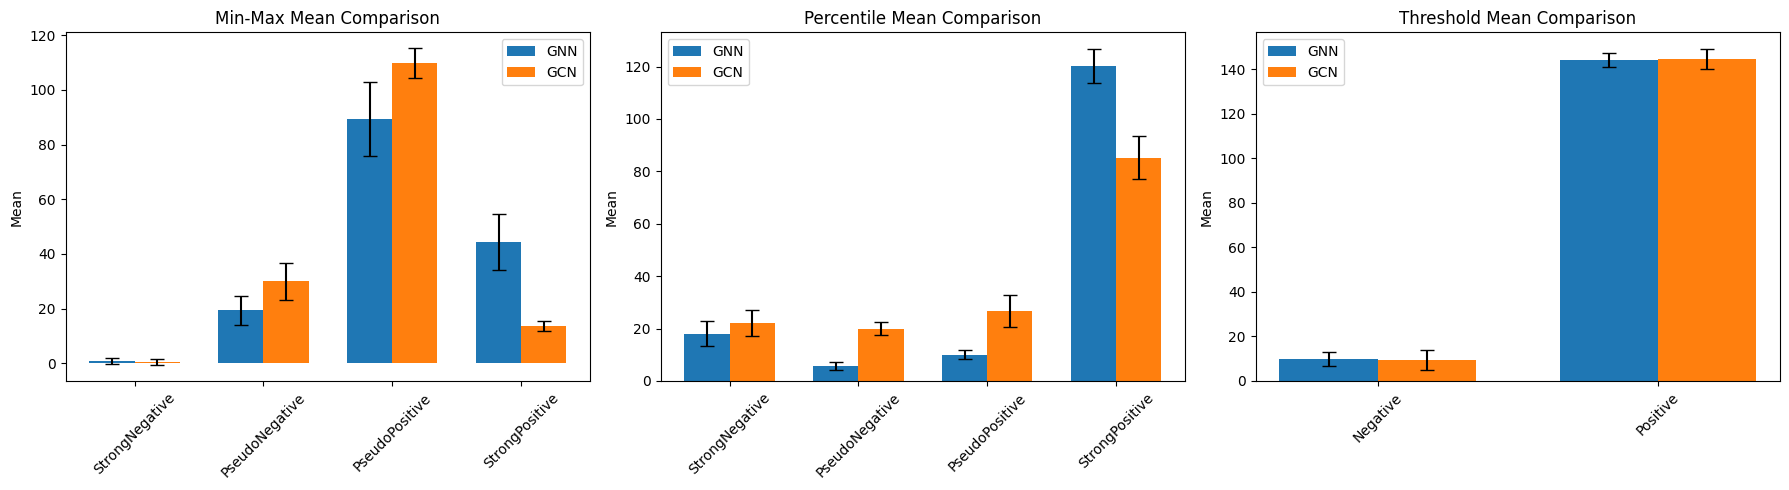

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === First results ===
min_max_1 = pd.DataFrame({
    "Label": ["StrongNegative", "PseudoNegative", "PseudoPositive", "StrongPositive"],
    "Min-Max Mean": [0.8, 19.4, 89.4, 44.4],
    "Min-Max Std": [1.166190, 5.388877, 13.455111, 10.209799]
})

percentile_1 = pd.DataFrame({
    "Label": ["StrongNegative", "PseudoNegative", "PseudoPositive", "StrongPositive"],
    "Percentile Mean": [18.0, 5.8, 10.0, 120.2],
    "Percentile Std": [4.690416, 1.469694, 1.673320, 6.523803]
})

threshold_1 = pd.DataFrame({
    "Label": ["Negative", "Positive"],
    "Threshold Mean": [9.8, 144.2],
    "Threshold Std": [3.249615, 3.249615]
})

# === Second results ===
min_max_2 = pd.DataFrame({
    "Label": ["StrongNegative", "PseudoNegative", "PseudoPositive", "StrongPositive"],
    "Min-Max Mean": [0.6, 30.0, 109.8, 13.6],
    "Min-Max Std": [1.2, 6.693280, 5.418487, 1.743560]
})

percentile_2 = pd.DataFrame({
    "Label": ["StrongNegative", "PseudoNegative", "PseudoPositive", "StrongPositive"],
    "Percentile Mean": [22.0, 20.0, 26.8, 85.2],
    "Percentile Std": [4.898979, 2.529822, 6.112283, 8.133880]
})

threshold_2 = pd.DataFrame({
    "Label": ["Negative", "Positive"],
    "Threshold Mean": [9.4, 144.6],
    "Threshold Std": [4.498889, 4.498889]
})

# === Merge and compare ===
def compare_results(df1, df2, key):
    merged = pd.merge(df1, df2, on="Label", suffixes=('_1', '_2'))
    merged[f"{key} Mean Diff"] = merged[f"{key} Mean_2"] - merged[f"{key} Mean_1"]
    merged[f"{key} Std Diff"] = merged[f"{key} Std_2"] - merged[f"{key} Std_1"]
    return merged[["Label", f"{key} Mean_1", f"{key} Mean_2", f"{key} Mean Diff",
                   f"{key} Std_1", f"{key} Std_2", f"{key} Std Diff"]]

min_max_comparison = compare_results(min_max_1, min_max_2, "Min-Max")
percentile_comparison = compare_results(percentile_1, percentile_2, "Percentile")
threshold_comparison = compare_results(threshold_1, threshold_2, "Threshold")

def plot_all_comparisons(min_max_df, percentile_df, threshold_df):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # Only one row now
    bar_width = 0.35

    categories = [
        ("Min-Max", min_max_df, "Min-Max Mean_1", "Min-Max Mean_2", "Min-Max Std_1", "Min-Max Std_2"),
        ("Percentile", percentile_df, "Percentile Mean_1", "Percentile Mean_2", "Percentile Std_1", "Percentile Std_2"),
        ("Threshold", threshold_df, "Threshold Mean_1", "Threshold Mean_2", "Threshold Std_1", "Threshold Std_2")
    ]

    for i, (title, df, mean1, mean2, std1, std2) in enumerate(categories):
        labels = df["Label"]
        x = np.arange(len(labels))

        axs[i].bar(x - bar_width/2, df[mean1], bar_width, yerr=df[std1], capsize=5, label="GNN", color='tab:blue')
        axs[i].bar(x + bar_width/2, df[mean2], bar_width, yerr=df[std2], capsize=5, label="GCN", color='tab:orange')
        axs[i].set_title(f"{title} Mean Comparison")
        axs[i].set_xticks(x)
        axs[i].set_xticklabels(labels, rotation=45)
        axs[i].set_ylabel("Mean")
        axs[i].legend()

    plt.tight_layout()
    plt.show()



# Run plotting function
plot_all_comparisons(min_max_comparison, percentile_comparison, threshold_comparison)


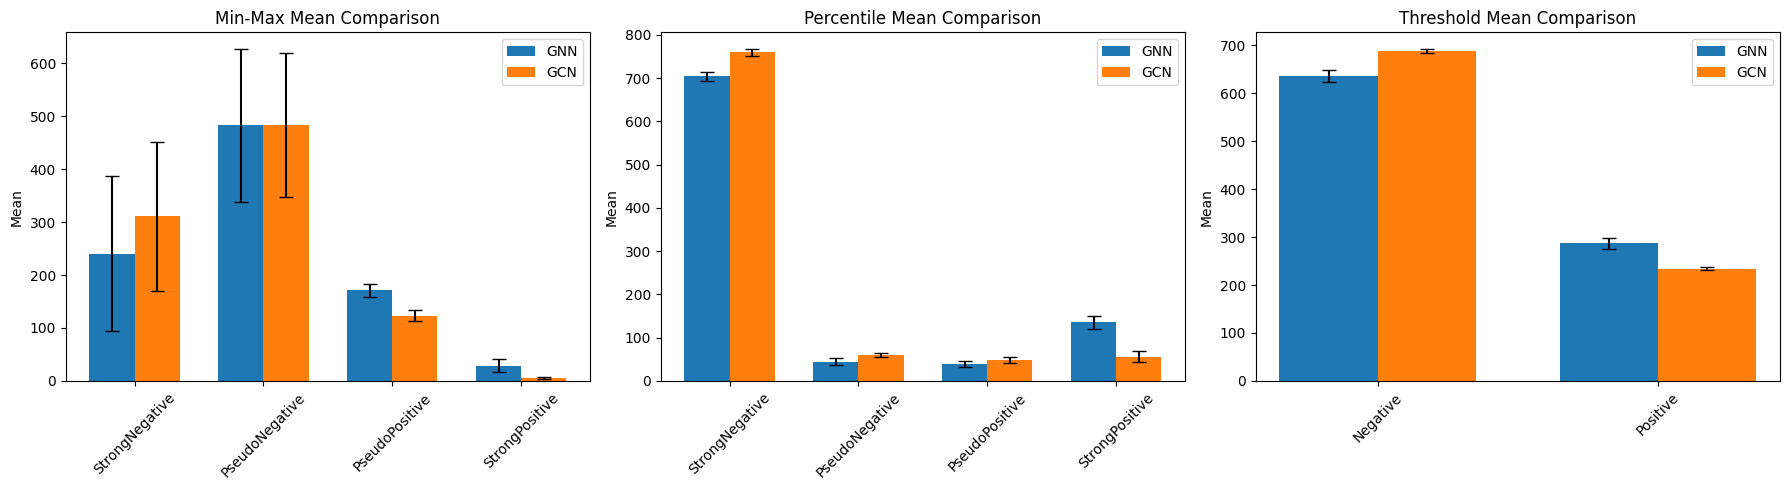

In [16]:
# === First new result set ===
min_max_3 = pd.DataFrame({
    "Label": ["StrongNegative", "PseudoNegative", "PseudoPositive", "StrongPositive"],
    "Min-Max Mean": [240.6, 482.6, 171.0, 28.8],
    "Min-Max Std": [146.945704, 144.566386, 11.798305, 11.956588]
})

percentile_3 = pd.DataFrame({
    "Label": ["StrongNegative", "PseudoNegative", "PseudoPositive", "StrongPositive"],
    "Percentile Mean": [703.8, 44.6, 38.8, 135.8],
    "Percentile Std": [9.410632, 8.593020, 6.939741, 14.864723]
})

threshold_3 = pd.DataFrame({
    "Label": ["Negative", "Positive"],
    "Threshold Mean": [636.4, 286.6],
    "Threshold Std": [12.043255, 12.043255]
})

# === Second new result set ===
min_max_4 = pd.DataFrame({
    "Label": ["StrongNegative", "PseudoNegative", "PseudoPositive", "StrongPositive"],
    "Min-Max Mean": [310.8, 483.4, 123.4, 5.4],
    "Min-Max Std": [141.059420, 136.293213, 9.810199, 2.059126]
})

percentile_4 = pd.DataFrame({
    "Label": ["StrongNegative", "PseudoNegative", "PseudoPositive", "StrongPositive"],
    "Percentile Mean": [759.4, 59.2, 48.2, 56.2],
    "Percentile Std": [8.064738, 4.995998, 7.573638, 12.718490]
})

threshold_4 = pd.DataFrame({
    "Label": ["Negative", "Positive"],
    "Threshold Mean": [688.6, 234.4],
    "Threshold Std": [3.720215, 3.720215]
})

# === Compare ===
def compare_results(df1, df2, key):
    merged = pd.merge(df1, df2, on="Label", suffixes=('_1', '_2'))
    merged[f"{key} Mean Diff"] = merged[f"{key} Mean_2"] - merged[f"{key} Mean_1"]
    merged[f"{key} Std Diff"] = merged[f"{key} Std_2"] - merged[f"{key} Std_1"]
    return merged[["Label", f"{key} Mean_1", f"{key} Mean_2", f"{key} Mean Diff",
                   f"{key} Std_1", f"{key} Std_2", f"{key} Std Diff"]]

min_max_comparison_new = compare_results(min_max_3, min_max_4, "Min-Max")
percentile_comparison_new = compare_results(percentile_3, percentile_4, "Percentile")
threshold_comparison_new = compare_results(threshold_3, threshold_4, "Threshold")

# === Plot ===
plot_all_comparisons(min_max_comparison_new, percentile_comparison_new, threshold_comparison_new)


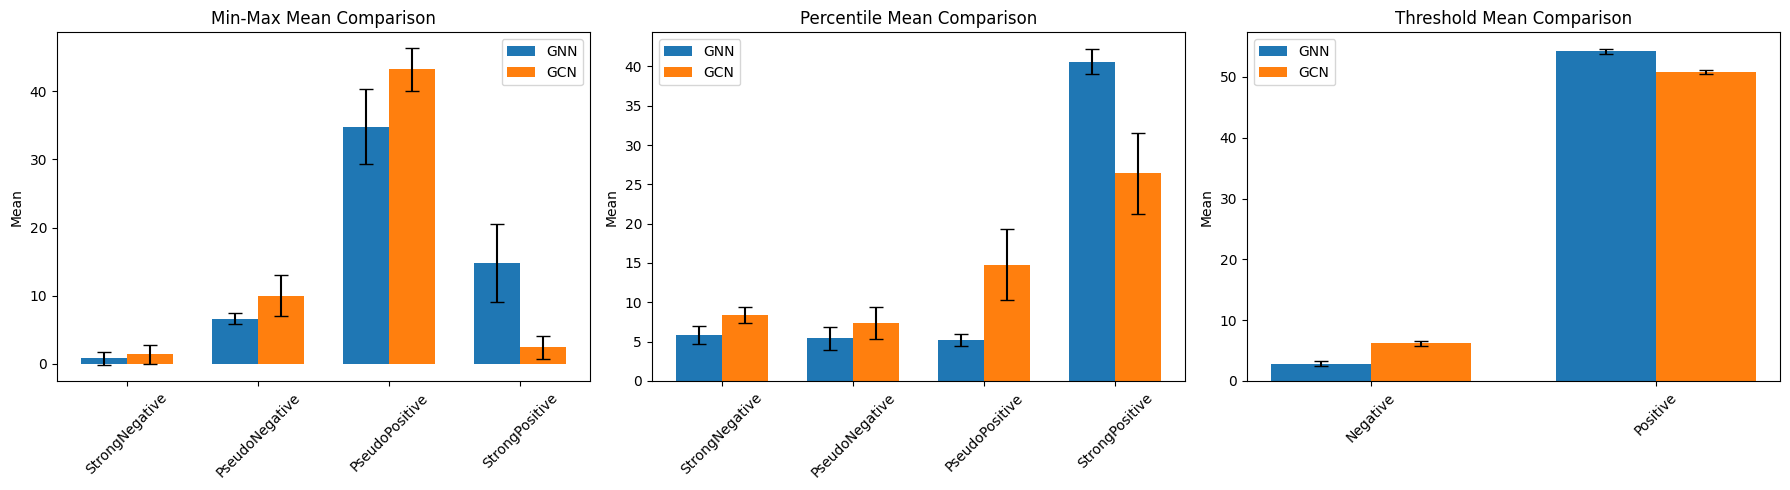

In [17]:
# === Third result set (first in this pair) ===
min_max_5 = pd.DataFrame({
    "Label": ["StrongNegative", "PseudoNegative", "PseudoPositive", "StrongPositive"],
    "Min-Max Mean": [0.8, 6.6, 34.8, 14.8],
    "Min-Max Std": [0.979796, 0.800000, 5.491812, 5.775812]
})

percentile_5 = pd.DataFrame({
    "Label": ["StrongNegative", "PseudoNegative", "PseudoPositive", "StrongPositive"],
    "Percentile Mean": [5.8, 5.4, 5.2, 40.6],
    "Percentile Std": [1.166190, 1.496663, 0.748331, 1.624808]
})

threshold_5 = pd.DataFrame({
    "Label": ["Negative", "Positive"],
    "Threshold Mean": [2.8, 54.2],
    "Threshold Std": [0.4, 0.4]
})

# === Fourth result set (second in this pair) ===
min_max_6 = pd.DataFrame({
    "Label": ["StrongNegative", "PseudoNegative", "PseudoPositive", "StrongPositive"],
    "Min-Max Mean": [1.4, 10.0, 43.2, 2.4],
    "Min-Max Std": [1.356466, 3.033150, 3.124100, 1.743560]
})

percentile_6 = pd.DataFrame({
    "Label": ["StrongNegative", "PseudoNegative", "PseudoPositive", "StrongPositive"],
    "Percentile Mean": [8.4, 7.4, 14.8, 26.4],
    "Percentile Std": [1.019804, 2.059126, 4.489989, 5.122499]
})

threshold_6 = pd.DataFrame({
    "Label": ["Negative", "Positive"],
    "Threshold Mean": [6.2, 50.8],
    "Threshold Std": [0.4, 0.4]
})

# === Compare ===
def compare_results(df1, df2, key):
    merged = pd.merge(df1, df2, on="Label", suffixes=('_1', '_2'))
    merged[f"{key} Mean Diff"] = merged[f"{key} Mean_2"] - merged[f"{key} Mean_1"]
    merged[f"{key} Std Diff"] = merged[f"{key} Std_2"] - merged[f"{key} Std_1"]
    return merged[["Label", f"{key} Mean_1", f"{key} Mean_2", f"{key} Mean Diff",
                   f"{key} Std_1", f"{key} Std_2", f"{key} Std Diff"]]

min_max_comparison_3 = compare_results(min_max_5, min_max_6, "Min-Max")
percentile_comparison_3 = compare_results(percentile_5, percentile_6, "Percentile")
threshold_comparison_3 = compare_results(threshold_5, threshold_6, "Threshold")

# === Plot ===
plot_all_comparisons(min_max_comparison_3, percentile_comparison_3, threshold_comparison_3)
